In [17]:
#!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 10.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 8.9 MB/s eta 0:00:00


In [29]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
df = pd.read_csv('../../data/CS_comparative_framework_indivs.csv', sep=';')

In [5]:
df

,researcher_id,LR_main_field,country_code_origin,first_year,age,active_years,topics,p,p_home,p_abroad
0,ur.0731050777.76,Biomedical and health sciences,US,2004,17,13,26,100,98,5.0
1,ur.012100225345.26,Mathematics and computer science,BR,2010,2,2,3,4,2,2.0
2,ur.013674027575.45,Social sciences and humanities,US,2010,9,6,3,15,15,NaN
3,ur.012677651255.25,Mathematics and computer science,US,2010,4,3,3,3,3,NaN
4,ur.01062131573.23,Life and earth sciences,US,2010,8,7,3,7,7,NaN
...,...,...,...,...,...,...,...,...,...,...
4156288,ur.01231635762.08,Physical sciences and engineering,HU,2005,4,3,3,4,4,NaN
4156289,ur.0706365407.55,Physical sciences and engineering,ZW,2002,19,12,8,19,1,18.0
4156290,ur.01114602255.11,Biomedical and health sciences,NG,2007,14,4,4,6,5,1.0
4156291,ur.01070053773.70,Biomedical and health sciences,US,2006,15,13,11,28,28,NaN


In [9]:
2142815/4156293

0.5155591773727213

In [11]:
df_unique = df.drop_duplicates('researcher_id')

In [14]:
df_unique['mobile'] = -df_unique.p_abroad.isnull()

/tmp/ipykernel_636/2895757629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['mobile'] = -df_unique.p_abroad.isnull()


In [15]:
df_unique

,researcher_id,LR_main_field,country_code_origin,first_year,age,active_years,topics,p,p_home,p_abroad,mobile
0,ur.0731050777.76,Biomedical and health sciences,US,2004,17,13,26,100,98,5.0,True
1,ur.012100225345.26,Mathematics and computer science,BR,2010,2,2,3,4,2,2.0,True
2,ur.013674027575.45,Social sciences and humanities,US,2010,9,6,3,15,15,NaN,False
3,ur.012677651255.25,Mathematics and computer science,US,2010,4,3,3,3,3,NaN,False
4,ur.01062131573.23,Life and earth sciences,US,2010,8,7,3,7,7,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...
4156268,ur.01126343437.89,Biomedical and health sciences,HU,2007,14,11,15,31,30,1.0,True
4156281,ur.0724672445.27,Physical sciences and engineering,CN,2006,6,3,2,4,4,NaN,False
4156282,ur.011263604437.89,Mathematics and computer science,CN,2009,3,4,2,7,6,1.0,True
4156284,ur.01245216405.40,Physical sciences and engineering,DZ,2008,7,7,2,8,8,NaN,False


In [24]:
df_unique['mobile'] =df_unique.mobile.astype(float)

/tmp/ipykernel_636/1432123923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['mobile'] =df_unique.mobile.astype(float)


In [41]:
main_countries = df_unique.country_code_origin.value_counts()[df_unique.country_code_origin.value_counts()>1000]

In [42]:
main_countries.index

Index(['US', 'CN', 'JP', 'DE', 'GB', 'BR', 'IN', 'FR', 'ES', 'IT', 'KR', 'CA',
       'RU', 'AU', 'TW', 'NL', 'TR', 'IR', 'SE', 'PL', 'CH', 'BE', 'GR', 'MX',
       'AT', 'PT', 'IL', 'FI', 'DK', 'MY', 'AR', 'SG', 'NO', 'CZ', 'EG', 'TH',
       'IE', 'ZA', 'CL', 'NZ', 'RO', 'UA', 'HU', 'TN', 'RS', 'PK', 'DZ', 'ID',
       'CO', 'NG', 'HR', 'BD', 'MA', 'SK', 'SI', 'SA', 'BG', 'LT', 'VN', 'EE',
       'KE', 'CU', 'BY', 'LB', 'JO', 'VE', 'LV', 'LK', 'UY', 'PE'],
      dtype='object')

In [43]:
df_logit = df_unique[df_unique.country_code_origin.isin(main_countries.index)]

In [44]:
df_logit.LR_main_field.value_counts()

Biomedical and health sciences       855368
Physical sciences and engineering    525883
Mathematics and computer science     287843
Life and earth sciences              230784
Social sciences and humanities       217797
Name: LR_main_field, dtype: int64

## Model 1. All co-variables:
LR_main_field + country_code_origin + age + active_years + topics

In [49]:
model_1 = smf.logit('mobile ~ C(LR_main_field, Treatment(reference="Biomedical and health sciences")) + C(country_code_origin, Treatment(reference="US")) + age + active_years + topics', data=df_logit).fit()

Optimization terminated successfully.
         Current function value: 0.492520
         Iterations 6


In [50]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 mobile   No. Observations:              2117675
Model:                          Logit   Df Residuals:                  2117598
Method:                           MLE   Df Model:                           76
Date:                Tue, 07 Feb 2023   Pseudo R-squ.:                  0.1449
Time:                        14:48:15   Log-Likelihood:            -1.0430e+06
converged:                       True   LL-Null:                   -1.2198e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================================================================================================
                                                                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                       -2.8996      0.006   -473.329      0.000      -2.912      -2.888
C(LR_main_field, Treatment(reference="Biomedical and health sciences"))[T.Life and earth sciences]               0.0004      0.006      0.074      0.941      -0.011       0.012
C(LR_main_field, Treatment(reference="Biomedical and health sciences"))[T.Mathematics and computer science]     -0.0310      0.006     -5.603      0.000      -0.042      -0.020
C(LR_main_field, Treatment(reference="Biomedical and health sciences"))[T.Physical sciences and engineering]     0.0441      0.005      9.765      0.000       0.035       0.053
C(LR_main_field, Treatment(reference="Biomedical and health sciences"))[T.Social sciences and humanities]       -0.1345      0.006    -22.693      0.000      -0.146      -0.123
C(country_code_origin, Treatment(reference="US"))[T.AR]                                                          0.3099      0.024     13.177      0.000       0.264       0.356
C(country_code_origin, Treatment(reference="US"))[T.AT]                                                          0.7985      0.020     39.938      0.000       0.759       0.838
C(country_code_origin, Treatment(reference="US"))[T.AU]                                                          0.5935      0.012     49.511      0.000       0.570       0.617
C(country_code_origin, Treatment(reference="US"))[T.BD]                                                          1.2905      0.037     35.311      0.000       1.219       1.362
C(country_code_origin, Treatment(reference="US"))[T.BE]                                                          0.8566      0.018     48.360      0.000       0.822       0.891
C(country_code_origin, Treatment(reference="US"))[T.BG]                                                          0.2183      0.051      4.255      0.000       0.118       0.319
C(country_code_origin, Treatment(reference="US"))[T.BR]                                                          0.1186      0.010     12.027      0.000       0.099       0.138
C(country_code_origin, Treatment(reference="US"))[T.BY]                                                          0.2824      0.067      4.231      0.000       0.152       0.413
C(country_code_origin, Treatment(reference="US"))[T.CA]                                                          0.8652      0.010     86.058      0.000       0.846       0.885
C(country_code_origin, Treatment(reference="US"))[T.CH]                                                          1.1837      0.016     73.112      0.000       1.152       1.215
C(country_code_origin, Treatment(reference="US"))[T.CL]

## Model 2. Only field and active years
LR_main_field + active_years 

In [52]:
model_2 = smf.logit('mobile ~ C(LR_main_field, Treatment(reference="Biomedical and health sciences")) + active_years', data=df_logit).fit()

Optimization terminated successfully.
         Current function value: 0.508376
         Iterations 6


In [53]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 mobile   No. Observations:              2117675
Model:                          Logit   Df Residuals:                  2117669
Method:                           MLE   Df Model:                            5
Date:                Tue, 07 Feb 2023   Pseudo R-squ.:                  0.1174
Time:                        14:55:25   Log-Likelihood:            -1.0766e+06
converged:                       True   LL-Null:                   -1.2198e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================================================================================================
                                                                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                       -2.6045      0.004   -612.805      0.000      -2.613      -2.596
C(LR_main_field, Treatment(reference="Biomedical and health sciences"))[T.Life and earth sciences]              -0.0431      0.006     -7.648      0.000      -0.054      -0.032
C(LR_main_field, Treatment(reference="Biomedical and health sciences"))[T.Mathematics and computer science]     -0.1132      0.005    -21.117      0.000      -0.124      -0.103
C(LR_main_field, Treatment(reference="Biomedical and health sciences"))[T.Physical sciences and engineering]    -0.0837      0.004    -19.346      0.000      -0.092      -0.075
C(LR_main_field, Treatment(reference="Biomedical and health sciences"))[T.Social sciences and humanities]       -0.0766      0.006    -13.227      0.000      -0.088      -0.065
active_years                                                                                                     0.2186      0.000    504.287      0.000       0.218       0.219
================================================================================================================================================================================
"""

# predictions, model 1

In [55]:
df_logit['p_model_1'] = model_1.predict(df_logit)
df_logit['p_model_2'] = model_2.predict(df_logit)

/tmp/ipykernel_636/3999478809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logit['p_model_1'] = model_1.predict(df_logit)
/tmp/ipykernel_636/3999478809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logit['p_model_2'] = model_2.predict(df_logit)


<AxesSubplot: xlabel='p_model_1', ylabel='p_model_2'>

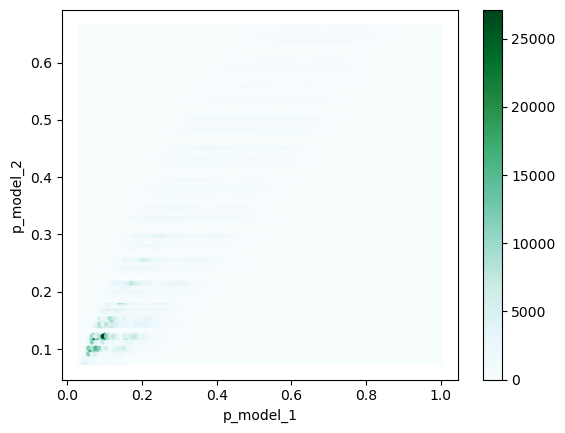

In [62]:
df_logit.plot(x='p_model_1', y='p_model_2',kind='hexbin')

In [71]:
probably_mobile_df = df_logit[df_logit.p_model_2>0.5]

<AxesSubplot: xlabel='p_model_1', ylabel='p_model_2'>

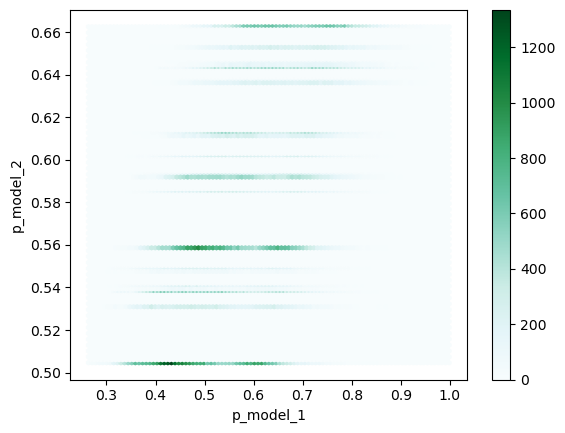

In [72]:
probably_mobile_df.plot(x='p_model_1', y='p_model_2',kind='hexbin')

In [73]:
probably_mobile_df.mobile.value_counts(normalize=True)

1.0    0.567666
0.0    0.432334
Name: mobile, dtype: float64

In [74]:
probably_mobile_df

,const,researcher_id,LR_main_field,country_code_origin,first_year,age,active_years,topics,p,p_home,p_abroad,mobile,p_model_1,p_model_2
0,1.0,ur.0731050777.76,Biomedical and health sciences,US,2004,17,13,26,100,98,5.0,1.0,0.574979,0.559006
18,1.0,ur.010371221051.68,Physical sciences and engineering,FI,2007,14,14,11,39,39,NaN,0.0,0.659527,0.591940
41,1.0,ur.01265144266.62,Mathematics and computer science,US,2004,17,14,9,31,31,NaN,0.0,0.521869,0.584813
42,1.0,ur.0672676407.55,Biomedical and health sciences,US,2008,13,12,8,27,27,NaN,0.0,0.421417,0.504635
49,1.0,ur.01246660370.60,Life and earth sciences,AU,2007,14,14,8,25,14,12.0,1.0,0.661497,0.601723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155723,1.0,ur.0627712775.41,Biomedical and health sciences,FR,2000,18,12,38,59,57,3.0,1.0,0.743005,0.504635
4155747,1.0,ur.0740031434.79,Biomedical and health sciences,CN,2008,13,14,18,44,43,1.0,1.0,0.484894,0.611998
4155797,1.0,ur.01336376054.01,Physical sciences and engineering,US,2008,13,14,6,31,31,NaN,0.0,0.517244,0.591940
4155876,1.0,ur.01121346715.64,Biomedical and health sciences,ES,2009,12,13,9,28,25,6.0,1.0,0.539740,0.559006
